In [63]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt 

In [64]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [65]:
df.drop(['customerID'], axis = 1, inplace=True)


## Data Cleaning 

In [66]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [67]:
df.TotalCharges.values

array(['29.85', '1889.5', '108.15', ..., '346.45', '306.6', '6844.5'],
      dtype=object)

In [68]:
df.shape

(7043, 20)

In [69]:
# convert the object into number
pd.to_numeric(df.TotalCharges, errors='coerce')

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [70]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [71]:
df = df.dropna()

In [72]:
df.shape

(7043, 20)

In [73]:
df = df[df['TotalCharges'] != ' ']

In [74]:
df.shape

(7032, 20)

In [76]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [77]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

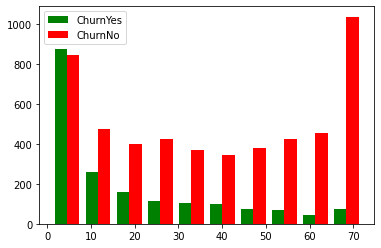

In [80]:
tenure_churn_no = df[df['Churn'] == 'No'].tenure
tenure_churn_yes = df[df['Churn'] == 'Yes'].tenure

plt.hist([tenure_churn_yes, tenure_churn_no], color= ['green', 'red'], label = ['ChurnYes', 'ChurnNo'])
plt.legend()

In [83]:
for col in df:
    if(df[col].dtypes == 'object'):
        print(col,df[col].unique())

gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


In [84]:
df.replace('No internet service', 'No', inplace=True)
df.replace('No phone service', 'No', inplace=True)

In [85]:
for col in df:
    if(df[col].dtypes == 'object'):
        print(col,df[col].unique())

gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes']
OnlineBackup ['Yes' 'No']
DeviceProtection ['No' 'Yes']
TechSupport ['No' 'Yes']
StreamingTV ['No' 'Yes']
StreamingMovies ['No' 'Yes']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


In [100]:
df['Partner'].replace({'Yes':1 , 'No':0}, inplace= True)
df['Dependents'].replace({'Yes':1 , 'No':0}, inplace= True)
df['PhoneService'].replace({'Yes':1 , 'No':0}, inplace= True)
df['MultipleLines'].replace({'Yes':1 , 'No':0}, inplace= True)
df['OnlineSecurity'].replace({'Yes':1 , 'No':0}, inplace= True)
df['OnlineBackup'].replace({'Yes':1 , 'No':0}, inplace= True)
df['DeviceProtection'].replace({'Yes':1 , 'No':0}, inplace= True)
df['TechSupport'].replace({'Yes':1 , 'No':0}, inplace= True)
df['StreamingTV'].replace({'Yes':1 , 'No':0}, inplace= True)
df['StreamingMovies'].replace({'Yes':1 , 'No':0}, inplace= True)
df['PaperlessBilling'].replace({'Yes':1 , 'No':0}, inplace= True)
df['Churn'].replace({'Yes':1 , 'No':0}, inplace= True)
df['gender'].replace({'Female':1 , 'Male':0}, inplace= True)


In [101]:
for col in df:
    print(col,df[col].unique())

gender [1 0]
SeniorCitizen [0 1]
Partner [1 0]
Dependents [0 1]
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService [0 1]
MultipleLines [0 1]
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity [0 1]
OnlineBackup [1 0]
DeviceProtection [0 1]
TechSupport [0 1]
StreamingTV [0 1]
StreamingMovies [0 1]
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling [1 0]
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn [0 1]


In [104]:
## one hot encoding for multiple values 
df2 = pd.get_dummies(data=df, columns= ['Contract', 'PaymentMethod', 'InternetService'])

In [105]:
df2.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No
0,1,0,1,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,1,0,0
1,0,0,0,0,34,1,0,1,0,1,...,0,1,0,0,0,0,1,1,0,0
2,0,0,0,0,2,1,0,1,1,0,...,1,0,0,0,0,0,1,1,0,0
3,0,0,0,0,45,0,0,1,0,1,...,0,1,0,1,0,0,0,1,0,0
4,1,0,0,0,2,1,0,0,0,0,...,1,0,0,0,0,1,0,0,1,0


In [106]:
df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
Contract_Month-to-month                      uint8
Contract_One year                            uint8
Contract_Two year              

In [110]:
#scaling 
col_scale = ['tenure','MonthlyCharges', 'TotalCharges']

from sklearn.preprocessing import MinMaxScaler

df2[col_scale] = MinMaxScaler().fit_transform(df2[col_scale])

In [112]:
X = df2.drop('Churn', axis=1)
Y = df2['Churn']

In [114]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=.20)

In [115]:
X_train.shape

(5625, 26)

In [116]:
X_test.shape

(1407, 26)

In [117]:
X_train.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,InternetService_DSL,InternetService_Fiber optic,InternetService_No
3637,0,0,0,0,0.112676,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,1
6184,0,0,0,0,0.563380,1,1,0,0,1,...,1,0,0,1,0,0,0,1,0,0
3553,0,0,0,0,0.859155,1,1,0,0,0,...,0,0,1,1,0,0,0,0,0,1
1270,0,0,1,1,0.873239,1,1,0,0,0,...,0,0,1,0,1,0,0,0,0,1
4438,0,0,1,1,0.704225,1,1,0,0,0,...,0,0,1,0,0,0,1,0,0,1


In [118]:
import tensorflow as tf
from tensorflow import keras

In [123]:
model = keras.Sequential([
    keras.layers.Dense(20,input_shape=(26,), activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer = 'adam', 
              loss = 'binary_crossentropy', 
              metrics = ['accuracy']
             )

model.fit(X_train, y_train, epochs=5)

Epoch 1/5
176/176 [==============================] - 1s 2ms/step - loss: 0.4794 - accuracy: 0.7607
Epoch 2/5
176/176 [==============================] - 0s 2ms/step - loss: 0.4310 - accuracy: 0.7895
Epoch 3/5
176/176 [==============================] - 1s 4ms/step - loss: 0.4225 - accuracy: 0.7966
Epoch 4/5
176/176 [==============================] - 0s 2ms/step - loss: 0.4187 - accuracy: 0.8016
Epoch 5/5
176/176 [==============================] - 1s 3ms/step - loss: 0.4160 - accuracy: 0.8025


In [124]:
model.evaluate(X_test, y_test)

44/44 [==============================] - 1s 2ms/step - loss: 0.4332 - accuracy: 0.8053


[0.43319618701934814, 0.8052594065666199]

In [129]:
yp = model.predict(X_test)
yp[:5]

array([[0.07504588],
       [0.5228171 ],
       [0.45188072],
       [0.5252019 ],
       [0.02402788]], dtype=float32)

In [130]:
y_pred = []
for i in yp:
    if(i<0.5):
        y_pred.append(0);
    else:
        y_pred.append(1);

In [131]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.92      0.87      1026
           1       0.70      0.50      0.58       381

    accuracy                           0.81      1407
   macro avg       0.76      0.71      0.73      1407
weighted avg       0.79      0.81      0.79      1407

